# Project: Investigate a Dataset - No-show appointment.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project will be analyzing data on no-show medical appointments made in some hospitals on Brazil. It contains the data of 110,527 appointments. The last column of the dataset tells whether or not there was no show. There are other fields that give information about the patient, time of appointment and place of appointment. The expectation of this project is to analyze the data and find out whether or not the dataset can be used to predict if a patient will not show up for an appointment. 

>Questions posed are:
What are the main characteristics of the patients? What are the main groups the patients may be classified into? Is there any significant difference between the proportion of patients that didn't show up for their appointments? What can be used to predict whether or not a patient will show up for appointment?

>The dataset is pretty clean and there are no missing data. Only minor cleaning needed to be done to the dataset. These are:
1. PatientId is not useful in the analysis. So, the field is dropped.
2. ScheduledDay and AppointmentDay contain both date and time. The time part of the fields is dropped, leaving only the date.
3. Someone has an Age of '-1'. This was changed to 1.

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
from datetime import datetime, date, time
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.formula.api import ols
import seaborn

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#df=pd.read_csv("noshowappointments-kagglev2-may.csv")
os.getcwd()
os.listdir()
#df=pd.read_csv("C:\Users\tilori\Documents\Mortgage\noshowappointments-kagglev2-may-2016.csv")
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
#df.info()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [8]:
df.info()
# The datatype pf bpth ScheduledDay and AppointmentDay need to be changed to datetetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


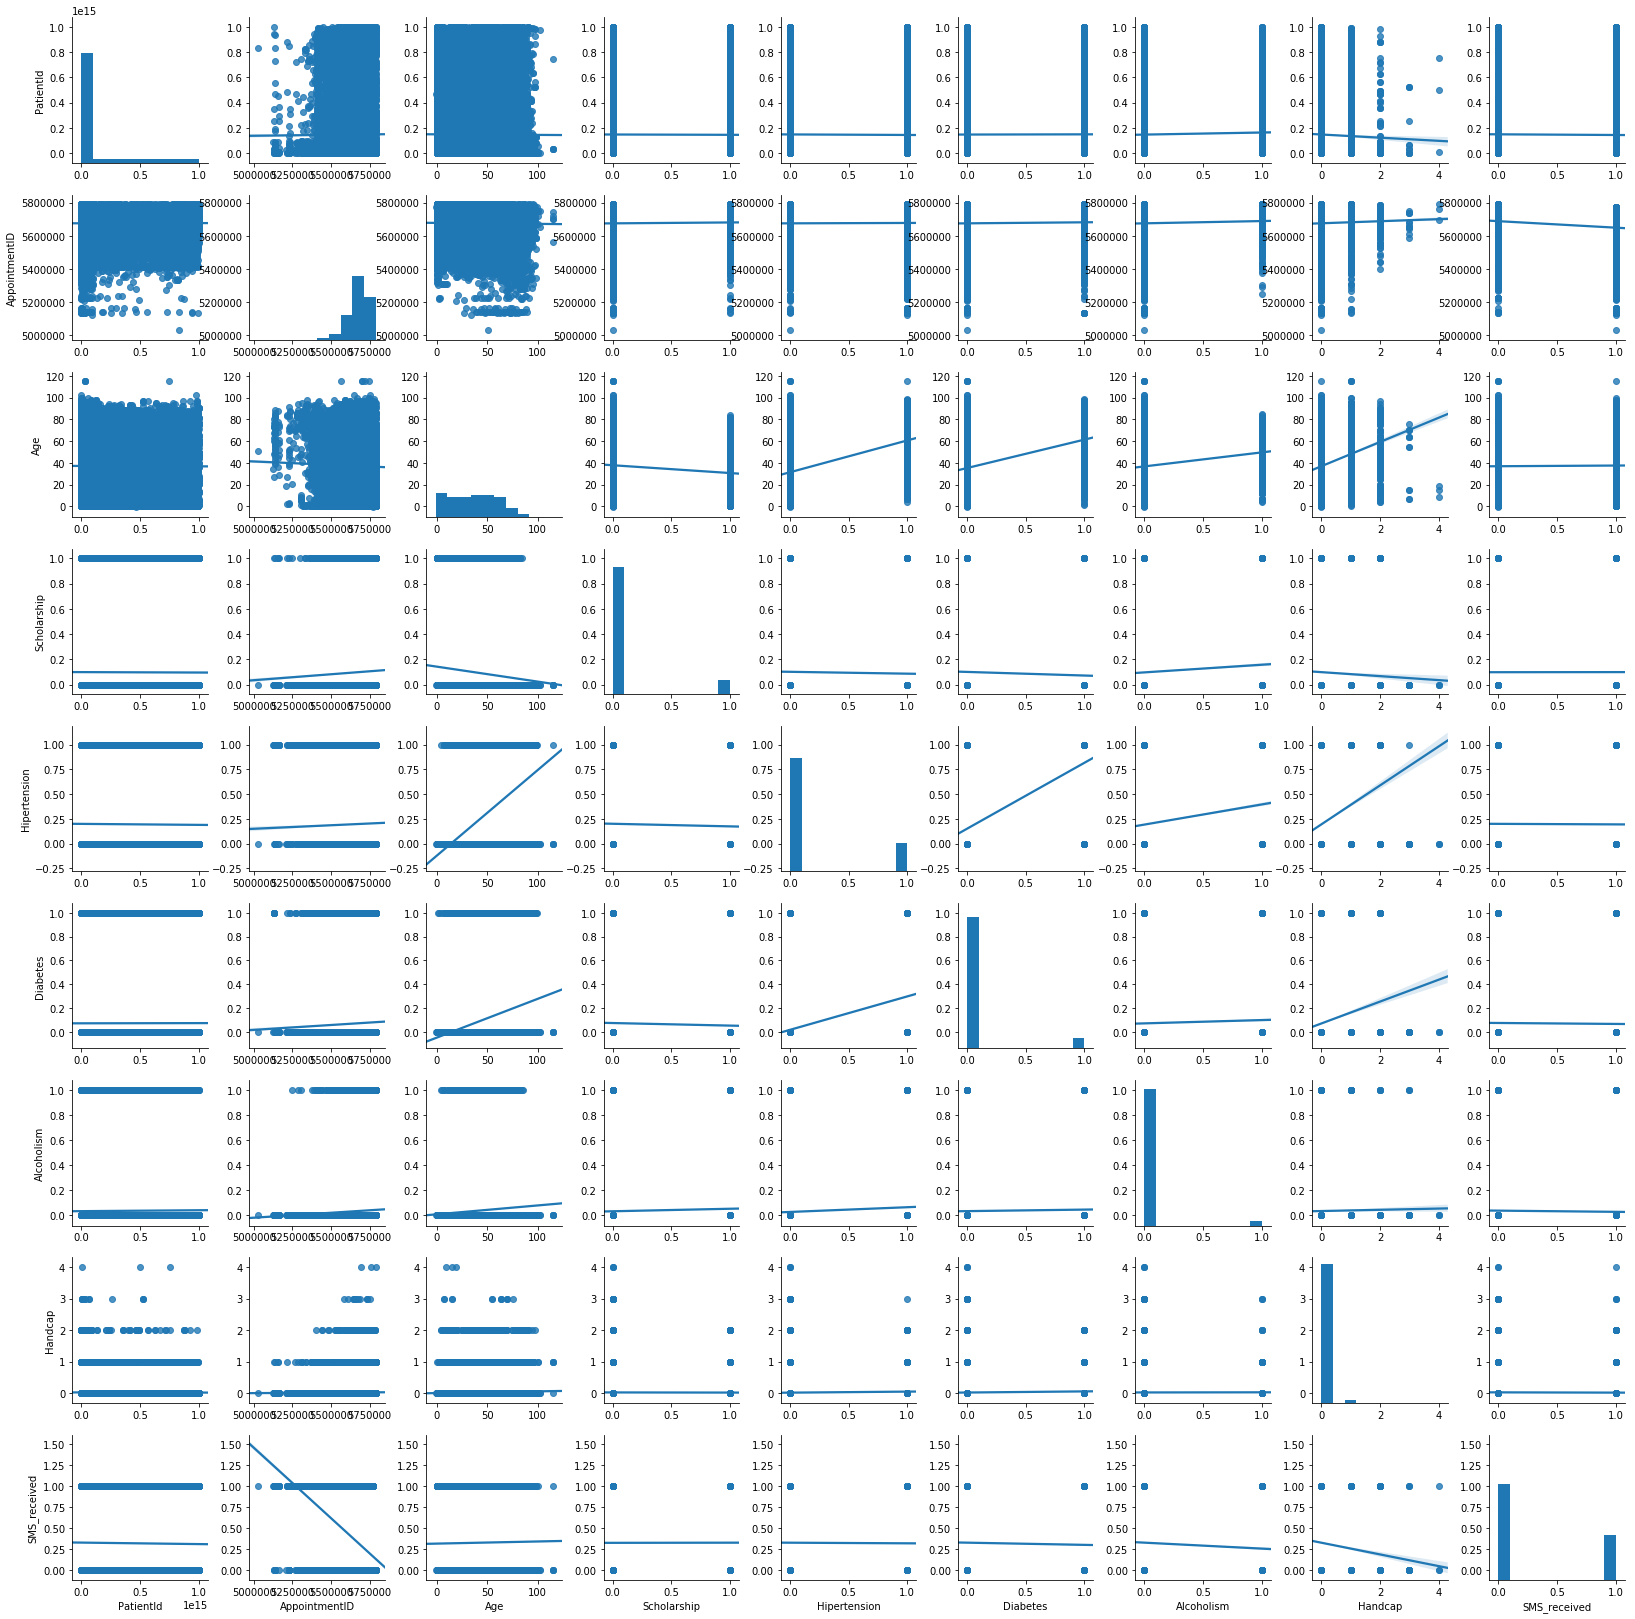

In [9]:
seaborn.pairplot(df,kind='reg')

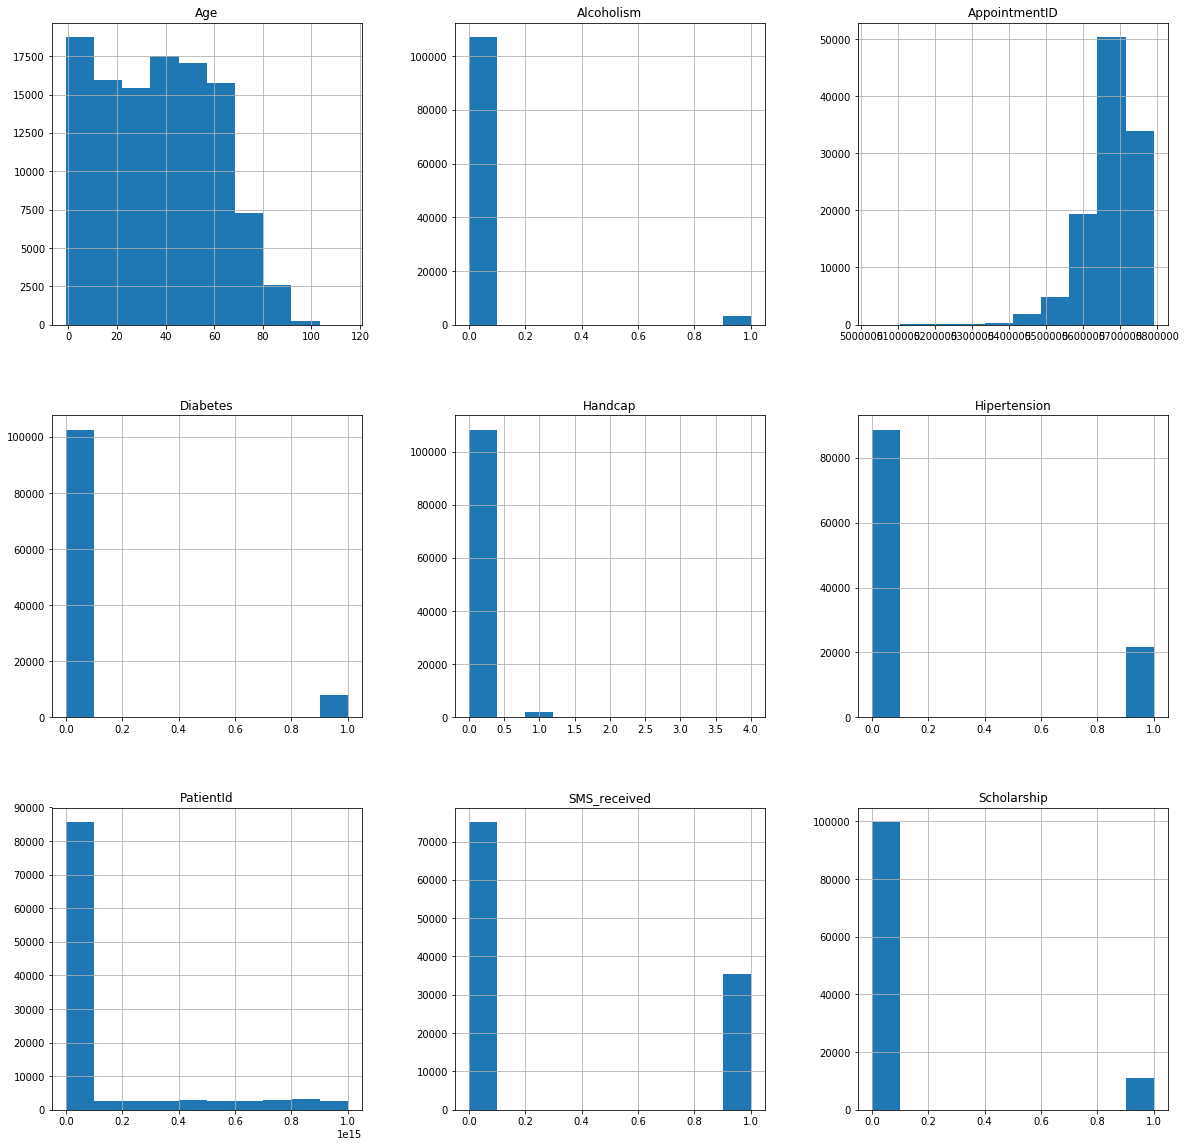

In [10]:
df.hist(figsize=(20,20));
# It should be noted that Age is positively skewed.

### Data Cleaning (Replace this with more specific notes!)

In [11]:
#This step changes the Age value of '-1' to '1'
df[df['Age']==-1]=df[df['Age']==-1].replace(-1, 1)

In [12]:
#This step drops both PatiendID and AppointmentID.
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#These two steps creates a new column called "NoShowCoded" with 1 representing no-show and 0 representing the patients that showed up.
df['NoShowCoded'] = np.where(df['No-show']=='yes', '1', '0')
df['NoShowCoded'] = np.where(df['No-show']=='No', '0', '1')

#The step below changes the data type of the new colum to int.
df['NoShowCoded'] = df['NoShowCoded'].str.extract('(\d+)').astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [14]:
#The step below changes the data type of ScheduledDay from string to datetime.
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
#In order to remove the time part of the field, it is converted to date
df['ScheduledDay']=df['ScheduledDay'].dt.date
#It was observed that date has data type object. So, I decided to change the field back to datetime but without the time part.
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])


In [15]:
#This step converts the data type of AppointmentDay to datetime.
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [16]:
#Rename "No-show" to NoShow to allow some operations
df=df.rename(columns = {'No-show':'NoShow'})

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1
> A. Are people prone to not showing up for appointment based on their neigborhood?
B. Are people likely not to show up for appointment dependingin on their Hipertension, Diabetes, Alcoholism, Handicap status as well as whether or not they received SMS?
C. Are people with same-day appointment more or less likely to show up for appointment?

In [102]:
#Create NoShow and Show as those that didn't show up and those that showed up respectively.
NoShow = df[df['NoShow']!='No']
Show = df[df['NoShow']=='No']

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,NoShowCoded
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,1
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1
21,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,1
22,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,1
31,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,1
44,F,2016-04-28,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,1
48,F,2016-04-26,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,1


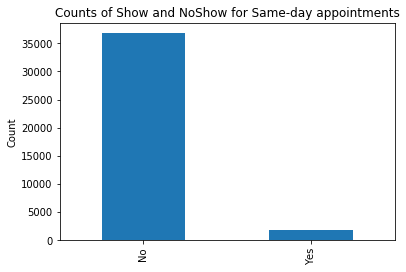

In [160]:
#Out of curiosity, I'd like to know if those that booked same-day appointment (scheduled day is the samme as appointment dat) were more or less prone to not showing up for the appointment than the other group.
SameDayAppointment = df[df['ScheduledDay']==df['AppointmentDay']]

ax=SameDayAppointment.NoShow.value_counts().plot(kind='bar', title='Counts of Show and NoShow for Same-day appointments');
ax.set_ylabel('Count');
# This shows that among the patients who made same-day appointment, a signigicantly low proportion did not show up for the appointment.

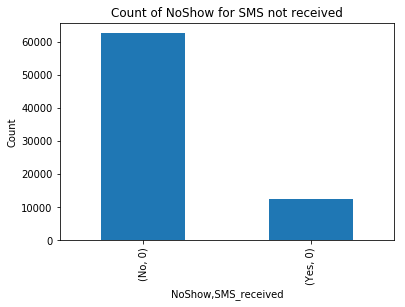

In [157]:
ax=df[df['SMS_received']==0].groupby('NoShow').SMS_received.value_counts().plot(kind='bar', title='Count of NoShow for SMS not received');
ax.set_ylabel('Count');

In [5]:
seaborn.pairplot(df, vars=['NoShow', 'Age'], kind='reg', hue='SEX')

NameError: name 'df' is not defined

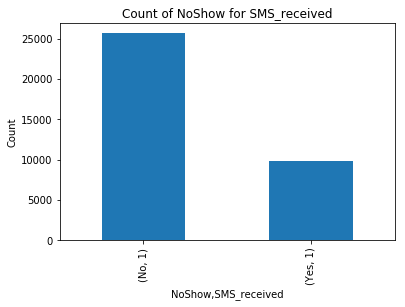

In [156]:
ax=df[df['SMS_received']==1].groupby('NoShow').SMS_received.value_counts().plot(kind='bar', title='Count of NoShow for SMS_received');
ax.set_ylabel('Count');

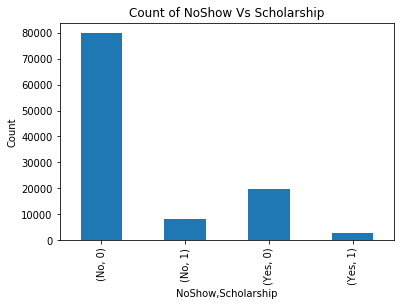

In [153]:
ax=df.groupby('NoShow').Scholarship.value_counts().plot(kind='bar', title='Count of NoShow Vs Scholarship');
ax.set_ylabel('Count');

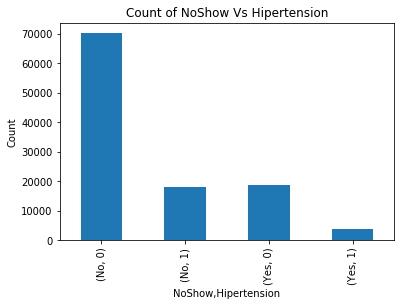

In [151]:
ax=df.groupby('NoShow').Hipertension.value_counts().plot(kind='bar', title='Count of NoShow Vs Hipertension');
ax.set_ylabel('Count');

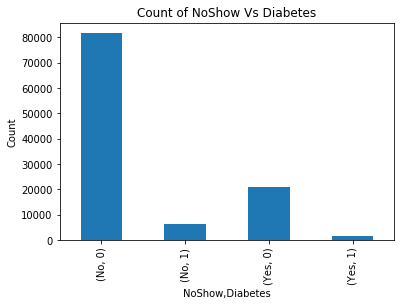

In [152]:
ax=df.groupby('NoShow').Diabetes.value_counts().plot(kind='bar', title='Count of NoShow Vs Diabetes');
ax.set_ylabel('Count');

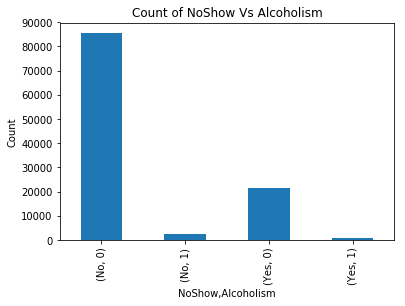

In [148]:
ax=df.groupby('NoShow').Alcoholism.value_counts().plot(kind='bar', title='Count of NoShow Vs Alcoholism');
ax.set_ylabel('Count');

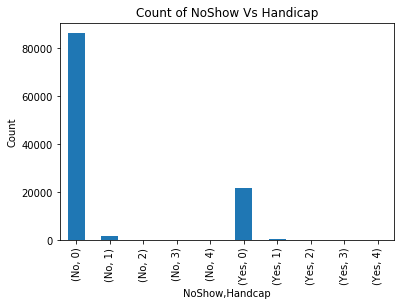

In [147]:
ax=df.groupby('NoShow').Handcap.value_counts().plot(kind='bar', title='Count of NoShow Vs Handicap');
ax.set_ylabel('Count');

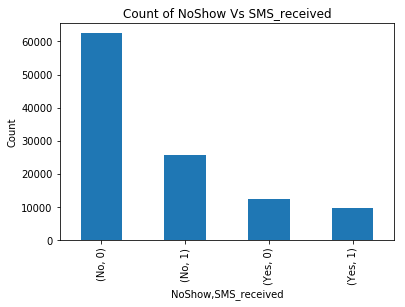

In [146]:
ax=df.groupby('NoShow').SMS_received.value_counts().plot(kind='bar', title='Count of NoShow Vs SMS_received');
ax.set_ylabel('Count');

In [49]:
df.groupby('NoShow').SMS_received.value_counts()

NoShow  SMS_received
No      0               62510
        1               25698
Yes     0               12535
        1                9784
Name: SMS_received, dtype: int64

In [50]:
Noshow1=df.NoShow=='Yes'
Show1=df.NoShow=='No'

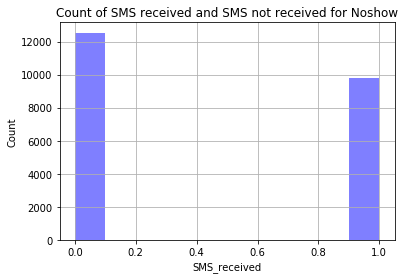

In [133]:
ax=df.SMS_received[Noshow1].hist(alpha=0.5 , label='NowShow', color='blue');
ax.set_title('Count of SMS received and SMS not received for Noshow');
ax.set_ylabel('Count');
ax.set_xlabel('SMS_received');

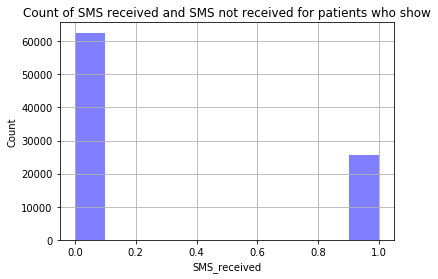

In [135]:
ax=df.SMS_received[Show1].hist(alpha=0.5 , label='Show', color='blue');
ax.set_title('Count of SMS received and SMS not received for patients who show');
ax.set_ylabel('Count');
ax.set_xlabel('SMS_received');

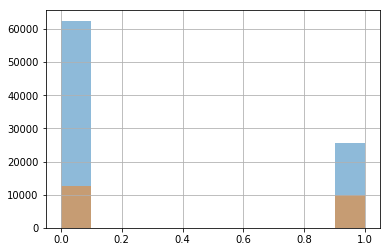

In [142]:
ax=df.groupby('NoShow').SMS_received.hist(alpha=0.5);
plt.legend()
plt.show()

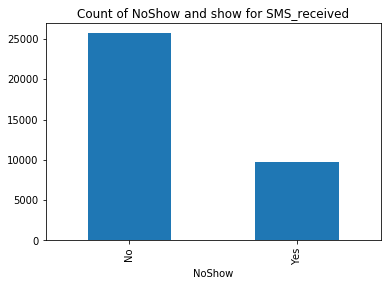

In [123]:
df.groupby('NoShow').SMS_received.sum().plot(kind='bar', title='Count of NoShow and show for SMS_received')
ax.set_ylabel('Count')
plt.show()

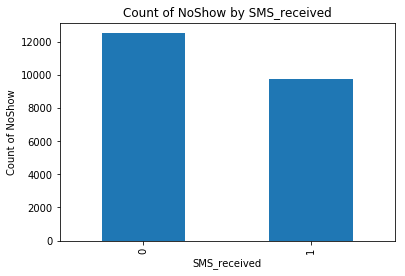

In [122]:
ax=df.groupby('SMS_received').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by SMS_received')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that more of those that did not receive sms did not show up.

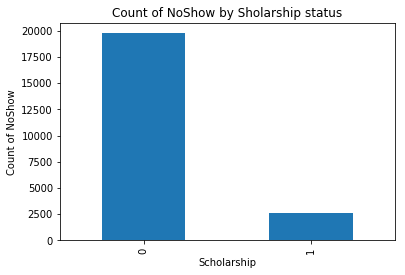

In [121]:
ax=df.groupby('Scholarship').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Sholarship status')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that a significantly more proportion og those patients without scholarship did not show up.

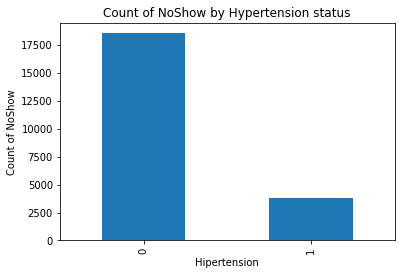

In [120]:
ax=df.groupby('Hipertension').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Hypertension status')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that a significantly more proportion of those patients without hypertension did not show up.

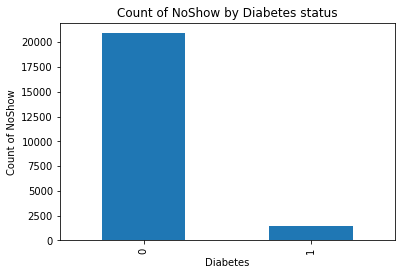

In [119]:
ax=df.groupby('Diabetes').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Diabetes status')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that a significantly more proportion of those patients without Diabetes did not show up.

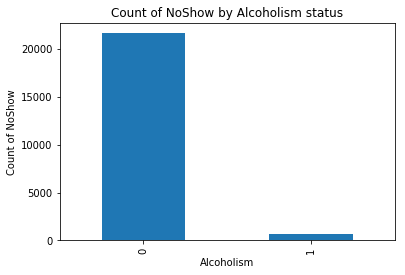

In [118]:
ax=df.groupby('Alcoholism').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Alcoholism status')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that a significantly more proportion of those patients without Alcoholism did not show up.

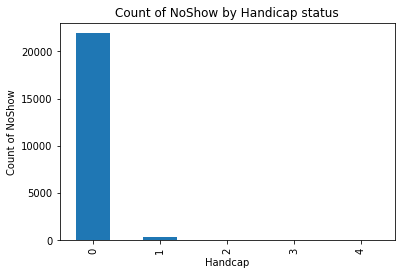

In [117]:
ax=df.groupby('Handcap').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Handicap status')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that a significantly more proportion of those patients who are not Handcapped did not show up.

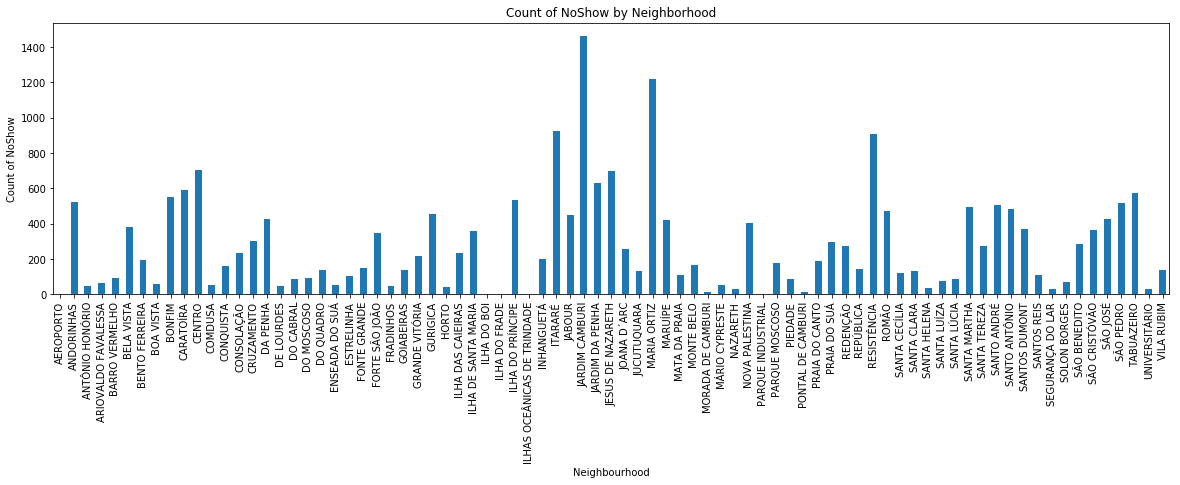

In [116]:
ax=df.groupby('Neighbourhood').NoShowCoded.sum().plot(kind='bar', figsize=(20,5), title='Count of NoShow by Neighborhood')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows the variation of the count of those who did not show up with the neighborhood. The chart shows that Jardim Camburi residents are most likely not to show up for appointment.

In [64]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

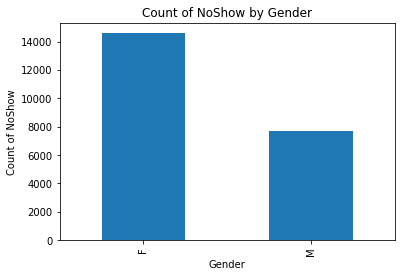

In [63]:
ax=df.groupby('Gender').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Gender')
ax.set_ylabel('Count of NoShow')
plt.show()
#This shows that females have a higher chance of not showing up than males. However, this may be because there are almost twice as many females than males.

In [1]:
df.Age[Noshow1].hist(alpha=0.5, color='blue', label='NoShow');
df.Age[Show1].hist(alpha=0.5, color='red', label='Show');
plt.legend();
#This shows that females have a higher chance of not showing up than males.

NameError: name 'df' is not defined

In [69]:
print(df.groupby('NoShow').SMS_received.value_counts())

NoShow  SMS_received
No      0               62510
        1               25698
Yes     0               12535
        1                9784
Name: SMS_received, dtype: int64


### Research Question 2 
>How can Scholarship, Age and SMS_received be used to predict whether or not there will be a no-show for an appointment?

In [74]:
# Multiple Regression Analysis
model = ols("NoShowCoded ~ Scholarship + Age+SMS_received", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            NoShowCoded   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     765.9
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:30:04   Log-Likelihood:                -54817.
No. Observations:              110527   AIC:                         1.096e+05
Df Residuals:                  110523   BIC:                         1.097e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2022      0.002     82.070   

> It can be seen that at 0.025 sigficicant level, the p value of Scholarship and Age are less than 0.025 while the p value of SMS_received is greater than 0.025. Those, only Scholarship and Age are significant in this analysis and therefore can be used to predict No-Show.
> The Regression equation is 

>NoShow=  0.2022 + 0.0316S - 0.001A

>where S stands for sholarship and A stands for Age.

<a id='conclusions'></a>
## Conclusions

From the analyses above, it has been shown that people with same-day appointment are more likely to show up for appointment than not. Even though the data shows that there are more females with no-show than male, we cannot conclude that females are more likely to not show up for appointment than male becuase there are almost twice as many females in the sample than males.

It was also observed that residents of certain neighborhood are more likely to not show up than residents of other neighborhoods. Jardim Camburi residents are most likely to not show up.

Three variables were analysed to see how they can be used to predict no show and it was found that only Age and sholarship are significant enough to predict no-show. On the other hand, SMS_received wasn't found to be significant enough.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])